In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

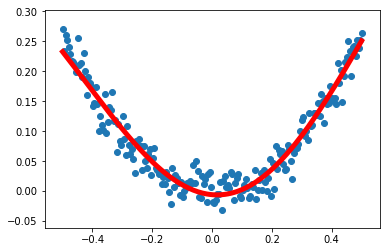

In [40]:
#使用numpy生成200个随机点范围在-0.5～0.5
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
#生成随机噪声
noise = np.random.normal(0,0.02,x_data.shape)
#定义y为x的平方加噪声， 图像会是二次函数+噪声
y_data = np.square(x_data) + noise

#定义两个占位符,形状设为n个样本点 每个样本有1个输入向量
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#定义神经网络中间层 w形状为[1,10]表示这层接收上一层1个输入 但有10个输出即这层有10个神经元
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1= tf.Variable(tf.zeros([1,10]))
#z = wx+b
z1 = tf.matmul(x,Weights_L1) + biases_L1
#a = g(z) 这里激活函数用的tanh
a1 = tf.nn.tanh(z1)

#定义输出层  w形状为[10,1]表示本层接收前一层的10个输入 本层输出一个值即只有一个神经元
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))

z2 = tf.matmul(a1,Weights_L2) + biases_L2
a2 = tf.nn.tanh(z2)

#代价函数
loss = tf.reduce_mean(tf.square(y-a2))
#梯度下降
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
#定义初始化
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(2000):
        sess.run(train_step,feed_dict = {x:x_data,y:y_data})
    
    # 获得预测值
    prediction = sess.run(a2,feed_dict={x:x_data})
    #画图
    plt.figure()
    
    #横轴为x_data纵轴为y_data的随机带有噪声的点
    plt.scatter(x_data,y_data)
    
    #横轴为x_data 纵轴为预测值的函数曲线
    plt.plot(x_data,prediction,'r-',lw = 5)
    
    plt.show()
